# CSE-221710309053-Hari Sarmishta

## Question:
### The problem that we are going to solve here is that given a set of features that describe a claimant who is going to claim for the insurance amount, our machine learning model must predict whether the claimant will hire an attorney or not to run the case. To train our machine learning model with insurance data, we will be using ClaimantsData 
--> In continuation to the class file:
* Make predictions on test data and calculate the precision, recall and f1-score.
* Find the frequency of categories in the CLMSEX column and plot a graph. Write the observations which category people are more.
* Plot the visualizations of the column CLMAGE and find the pattern in the data like which age group people were more as claimants 
* Visualize how many claimants are going to hire an attorney with respect to CLMSEX i.e., out of male claimants how many will hire an attorney; out of female how many will hire an attorney
* Check the correlation of the dataset and visualize it through heatmap
* Calculate the number people who did not wear SEATBELT, what is their percentage of hiring attorney 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/claimants.csv")
data.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [3]:
data

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
5,97,0,1.0,1.0,0.0,35.0,0.309
6,10,0,0.0,1.0,0.0,9.0,3.538
7,36,0,1.0,1.0,0.0,34.0,4.881
8,51,1,1.0,1.0,0.0,60.0,0.874
9,55,1,0.0,1.0,0.0,NaN,0.350


### In Attorney 0-Not hiring an attorney  and 1-hiring to attorney
### In clmsex 0-male 1-female
### In Seatbelt 0-no seatbelt 1- seatbelt

In [4]:
data.shape

(1340, 7)

In [5]:
## droping the CASENUM column
data.drop(['CASENUM'],axis=1,inplace=True)
data

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038
5,0,1.0,1.0,0.0,35.0,0.309
6,0,0.0,1.0,0.0,9.0,3.538
7,0,1.0,1.0,0.0,34.0,4.881
8,1,1.0,1.0,0.0,60.0,0.874
9,1,0.0,1.0,0.0,NaN,0.350


In [6]:
data.shape

(1340, 6)

In [7]:
data.describe()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,0.488806,0.558735,0.907621,0.017028,28.414422,3.806307
std,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,0.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ATTORNEY,1340.0,0.488806,0.500061,0.0,0.0,0.0000,1.0000,1.000
CLMSEX,1328.0,0.558735,0.496725,0.0,0.0,1.0000,1.0000,1.000
CLMINSUR,1299.0,0.907621,0.289671,0.0,1.0,1.0000,1.0000,1.000
SEATBELT,1292.0,0.017028,0.129425,0.0,0.0,0.0000,0.0000,1.000
CLMAGE,1151.0,28.414422,20.304451,0.0,9.0,30.0000,43.0000,95.000
LOSS,1340.0,3.806307,10.636903,0.0,0.4,1.0695,3.7815,173.604


In [9]:
## Checking for missing values
data.isnull().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

#### data['CLMSEX']=data['CLMSEX'].fillna()
#### data['CLMINSUR']=data['CLMINSUR'].fillna()

In [10]:
data.CLMSEX.value_counts().index[0]

1.0

## Importing the missing values

In [11]:
## Creating a user-defined function for imputing the missing values 
#with mode(numerical and categorical data)
def fill_na(col):
    col.fillna(col.value_counts().index[0],inplace=True)
    return col
data.apply(lambda col:fill_na(col))

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038
5,0,1.0,1.0,0.0,35.0,0.309
6,0,0.0,1.0,0.0,9.0,3.538
7,0,1.0,1.0,0.0,34.0,4.881
8,1,1.0,1.0,0.0,60.0,0.874
9,1,0.0,1.0,0.0,10.0,0.350


In [12]:
data.isnull().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

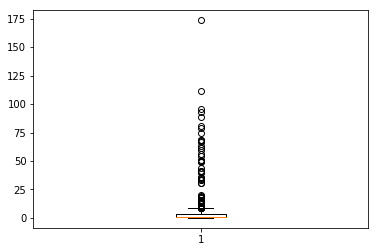

In [13]:
##Loss Column ## Datapoint<Q1-1.5
plt.boxplot(data.LOSS)
plt.show()

--> Data Entry mistake

* Outliers also missing values --> Imputation
* Winsorization--> Outliers are replaced with next small value

    Example:[1,2,3,4,5,6,.....,9000]--> 9000 as an outlier--> 9000 will be replace with 89
    
    One analysis--> including outliers
    
    One analysis--> drop all the outliers

In [14]:
##Split the data into Input and Output
X = data.iloc[:,1:]
X.head()

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,1.0,0.0,50.0,34.940
1,1.0,0.0,0.0,18.0,0.891
2,0.0,1.0,0.0,5.0,0.330
3,0.0,1.0,1.0,31.0,0.037
4,0.0,1.0,0.0,30.0,0.038


In [15]:
y=data.ATTORNEY
y.head()

0    0
1    1
2    1
3    0
4    1
Name: ATTORNEY, dtype: int64

In [16]:
#Split thedata into training and testing
#Build the model on training data and check the model performance on test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [17]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
#Build the classifier on training data
#Sklearn library: import ,instantiate,fit
from  sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(X_train,y_train) #Input and Output will be passes to the fit method

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [18]:
#Predicting on train data
#Syntax: objectName.predict(Input)
y_train_pred = reg.predict(X_train)
y_train_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,

In [19]:
#Confusion matrix for training data
#Confusion matrix(Actual Values,Predicted Values)
from sklearn.metrics import confusion_matrix,accuracy_score
conf = confusion_matrix(y_train,y_train_pred)
conf

array([[315, 170],
       [107, 346]], dtype=int64)

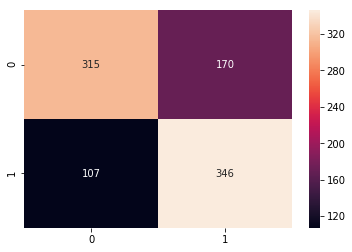

In [20]:
sns.heatmap(conf,annot=True,fmt='3.0f')

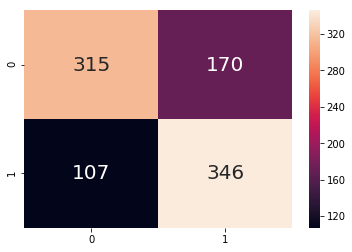

In [21]:
sns.heatmap(confusion_matrix(y_train,y_train_pred),annot=True,fmt='3.0f',annot_kws={'size':'20'})

In [22]:
conf[0][0]

315

In [23]:
conf[0][1]

170

In [24]:
print('true_positive =',conf[0][0])
print('false_positive =',conf[0][1])
print('true_negative =',conf[1][0])
print('false_negative =',conf[1][1])

true_positive = 315
false_positive = 170
true_negative = 107
false_negative = 346


1 ---> Hiring an Attorney 0 
---> Not Hiring an Attorney Number of False Positives

In [25]:
##Accuracy--> TP+TN/TP+FPTN+FN
(315+345)/(315+170+108+345)

0.7036247334754797

In [26]:
accuracy_score(y_train,y_train_pred)

0.7046908315565032

In [27]:
X_train.shape

(938, 5)

In [28]:
X_train

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
744,1.0,1.0,0.0,40.0,5.091
363,1.0,1.0,0.0,46.0,173.604
10,1.0,1.0,0.0,37.0,6.190
971,0.0,1.0,0.0,68.0,9.008
634,1.0,1.0,1.0,10.0,8.053
554,1.0,1.0,0.0,10.0,0.500
314,1.0,1.0,0.0,0.0,1.380
419,0.0,0.0,0.0,50.0,3.719
525,0.0,1.0,0.0,13.0,0.085
1043,0.0,1.0,0.0,9.0,3.050


In [29]:
true_positive =conf[0][0]
false_positive =conf[0][1]
false_negative =conf[1][0]
true_negative =conf[1][1]

In [30]:
## Precision Rate
Precision = true_positive/(true_positive+false_positive)
Precision

0.6494845360824743

In [31]:
from sklearn.metrics import precision_score
precision_score(y_train,y_train_pred)

0.6705426356589147

In [32]:
#Out of all the actual positive values, how many are truly positive
Recall = true_positive/(true_positive+false_negative)
Recall

0.7464454976303317

In [33]:
##Calculation f1-score for the model
from sklearn.metrics import f1_score
f1_score(y_train,y_train_pred) #f1_score(Actual Values,Predicted Values)

0.7141382868937047

* Prediction on Test Data
* Calculate the metrics for test data--> confusion matrix
* Precision,Recall,F1-Score
* Compare the score with training data

In [34]:
## Make predictions on test data and calculate the precision, recall and f1-score.
from  sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(X_test,y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [35]:
y_test_pred = reg.predict(X_test)
y_test_pred

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,

In [36]:
from sklearn.metrics import confusion_matrix,accuracy_score
conf = confusion_matrix(y_test,y_test_pred)
conf

array([[119,  81],
       [ 39, 163]], dtype=int64)

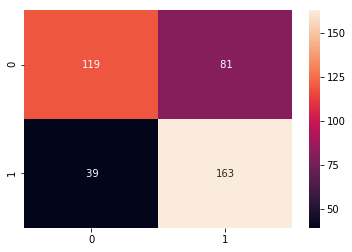

In [37]:
sns.heatmap(conf,annot=True,fmt='3.0f')

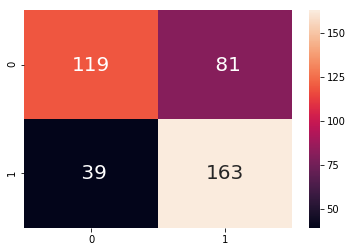

In [38]:
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True,fmt='3.0f',annot_kws={'size':'20'})

In [39]:
print('true_positive =',conf[0][0])
print('false_positive =',conf[0][1])
print('true_negative =',conf[1][0])
print('false_negative =',conf[1][1])

true_positive = 119
false_positive = 81
true_negative = 39
false_negative = 163


In [40]:
true_positive =conf[0][0]
false_positive =conf[0][1]
false_negative =conf[1][0]
true_negative =conf[1][1]

In [41]:
accuracy_score(y_test,y_test_pred)

0.7014925373134329

In [42]:
from sklearn.metrics import precision_score
precision_score(y_test,y_test_pred)

0.6680327868852459

In [43]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.7531645569620253

In [44]:
from sklearn.metrics import f1_score
f1_score(y_test,y_test_pred)

0.7309417040358746

In [45]:
##Find the frequency of categories in the CLMSEX column and plot a graph.
##Write the observations which category people are more.
data.CLMSEX.value_counts()

1.0    754
0.0    586
Name: CLMSEX, dtype: int64

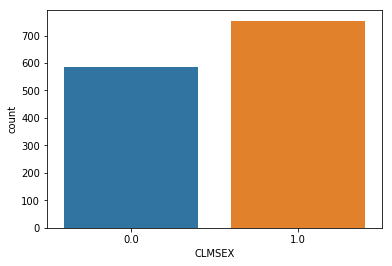

In [46]:
sns.countplot(data.CLMSEX)

### As observed in the above graph ,we can conclude that female are more as claimants.

In [47]:
##Plot the visualizations of the column CLMAGE and find the pattern in the data like which age group people
##were more as claimants 
data.CLMAGE.describe()

count    1340.000000
mean       25.817164
std        19.879401
min         0.000000
25%        10.000000
50%        17.000000
75%        40.000000
max        95.000000
Name: CLMAGE, dtype: float64

In [48]:
data['CLMRANGE']=pd.cut(data.CLMAGE,bins=[0,10,17,40,95])

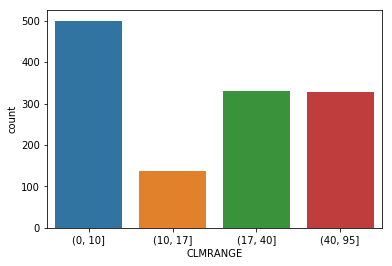

In [49]:
sns.countplot(data.CLMRANGE)

### 0-10 Age group are more as claimants.

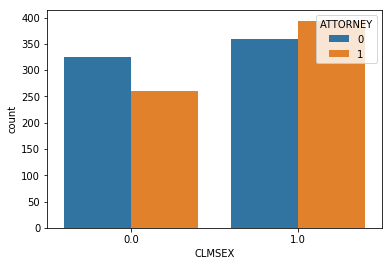

In [50]:
# Visualize how many claimants are going to hire an attorney with respect to CLMSEX i.e., 
#out of male claimants how many will hire an attorney; out of female how many will hire an attorney
sns.countplot(data.CLMSEX,hue=data.ATTORNEY)

### Female claimants hire the Attorney mostly and Male claimant hire the Attorney lesser times than Female

In [51]:
## Check the correlation of the dataset and visualize it through heatmap
data.corr()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
ATTORNEY,1.000000,0.076564,0.076631,-0.055848,-0.016396,-0.219715
CLMSEX,0.076564,1.000000,0.065976,-0.016327,-0.013789,-0.028412
CLMINSUR,0.076631,0.065976,1.000000,0.019953,0.030389,0.004641
SEATBELT,-0.055848,-0.016327,0.019953,1.000000,-0.018020,0.111879
CLMAGE,-0.016396,-0.013789,0.030389,-0.018020,1.000000,0.051575
LOSS,-0.219715,-0.028412,0.004641,0.111879,0.051575,1.000000


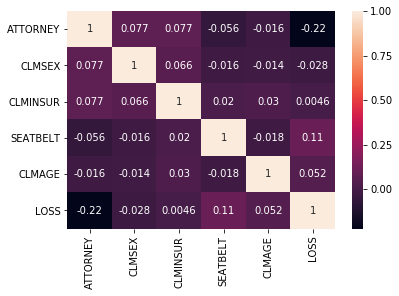

In [52]:
sns.heatmap(data.corr(),annot=True)

In [53]:
##Calculate the number people who did not wear SEATBELT, what is their percentage of hiring attorney 
se=data[data.SEATBELT==0]
se.shape[0]

1318

In [54]:
seat=se[se.ATTORNEY==1]
seat.shape[0]

649

In [55]:
##Percentage of hiring attorney who did not wear SEATBELT
(seat.shape[0]/se.shape[0])*100

49.241274658573595